In [128]:
from pandas import read_csv 
from pandas import set_option 
from matplotlib import pyplot 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split 
import numpy as np 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.svm import LinearSVC 
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import pandas as pd

In [129]:
data = read_csv('Heart2.csv')

data

,1,39,0,0.1,0.2,0.3,195,106,70,26.97,80,77,0.4
0,0,46,0,0,0,0,250,121.0,81.0,28.73,95,76,0
1,1,48,1,20,0,0,245,127.5,80.0,25.34,75,70,0
2,0,61,1,30,1,0,225,150.0,95.0,28.58,65,103,1
3,0,46,1,23,0,0,285,130.0,84.0,23.10,85,85,0
4,0,43,0,0,1,0,228,180.0,110.0,30.30,77,99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232,1,50,1,1,1,0,313,179.0,92.0,25.97,66,86,1
4233,1,51,1,43,0,0,207,126.5,80.0,19.71,65,68,0
4234,0,48,1,20,0,0,248,131.0,72.0,22.00,84,86,0
4235,0,44,1,15,0,0,210,126.5,87.0,19.16,86,0,0


In [130]:
array = data. values

In [131]:
print(array)

[[  0.  46.   0. ...  95.  76.   0.]
 [  1.  48.   1. ...  75.  70.   0.]
 [  0.  61.   1. ...  65. 103.   1.]
 ...
 [  0.  48.   1. ...  84.  86.   0.]
 [  0.  44.   1. ...  86.   0.   0.]
 [  0.  52.   0. ...  80. 107.   0.]]


In [132]:
K = array[:,0:12]
L = array[:,12]

In [133]:
valid_size = 0.30
seed = 10

In [134]:
K_train,K_valid,L_train,L_valid = train_test_split(K,L,test_size=valid_size,random_state=seed)

In [135]:
models = [] 
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=5000))) 
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB())) 
models.append(('SVM', SVC())) 
models.append(('RFC', RandomForestClassifier()))

In [136]:
results=[]
names=[]
for name, model in models:
    kfold = KFold(n_splits=10,random_state=None)
    cv_results= cross_val_score(model,K_train,L_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg= "%s: %f(%f)"% (name,cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.579065(0.023423)
LDA: 0.580079(0.022319)
KNN: 0.526139(0.019324)
CART: 0.514335(0.032601)
NB: 0.568290(0.035177)
SVM: 0.559166(0.023797)
RFC: 0.549059(0.026393)


In [137]:
print (K_train)
length = len(K_train)

[[ 1.   59.    0.   ... 27.27 62.   94.  ]
 [ 0.   46.    0.   ... 27.22 85.   75.  ]
 [ 1.   44.    1.   ... 25.46 75.   70.  ]
 ...
 [ 1.   62.    1.   ... 24.46 68.   95.  ]
 [ 0.   49.    0.   ... 24.17 75.   87.  ]
 [ 0.   40.    1.   ... 21.84 88.   67.  ]]


In [138]:
print (L_train)

[0. 0. 0. ... 0. 1. 0.]


In [139]:
print (length)

2965


In [140]:
K_train2d = np.array(K_train).reshape(length,12)
L_train2d = np.array(L_train).reshape(length,1)



In [141]:
LR = LogisticRegression(solver='lbfgs', max_iter=5000)
LR.fit(K_train2d,L_train)
L_pred_LR = LR.decision_function(K_valid)

In [142]:
len1= len(K_valid)
print (len1)

1272


In [143]:
K_valid2d = np.array(K_valid).reshape(len1,12)
predictions = LR.predict(K_valid2d)
print(predictions)

[0. 0. 0. ... 0. 1. 0.]


In [144]:
print(K_train2d)

[[ 1.   59.    0.   ... 27.27 62.   94.  ]
 [ 0.   46.    0.   ... 27.22 85.   75.  ]
 [ 1.   44.    1.   ... 25.46 75.   70.  ]
 ...
 [ 1.   62.    1.   ... 24.46 68.   95.  ]
 [ 0.   49.    0.   ... 24.17 75.   87.  ]
 [ 0.   40.    1.   ... 21.84 88.   67.  ]]


In [145]:
print(accuracy_score(L_valid, predictions)) 
print(confusion_matrix(L_valid, predictions)) 
print(classification_report(L_valid, predictions)) 


0.5589622641509434
[[562 159]
 [402 149]]
              precision    recall  f1-score   support

         0.0       0.58      0.78      0.67       721
         1.0       0.48      0.27      0.35       551

    accuracy                           0.56      1272
   macro avg       0.53      0.52      0.51      1272
weighted avg       0.54      0.56      0.53      1272



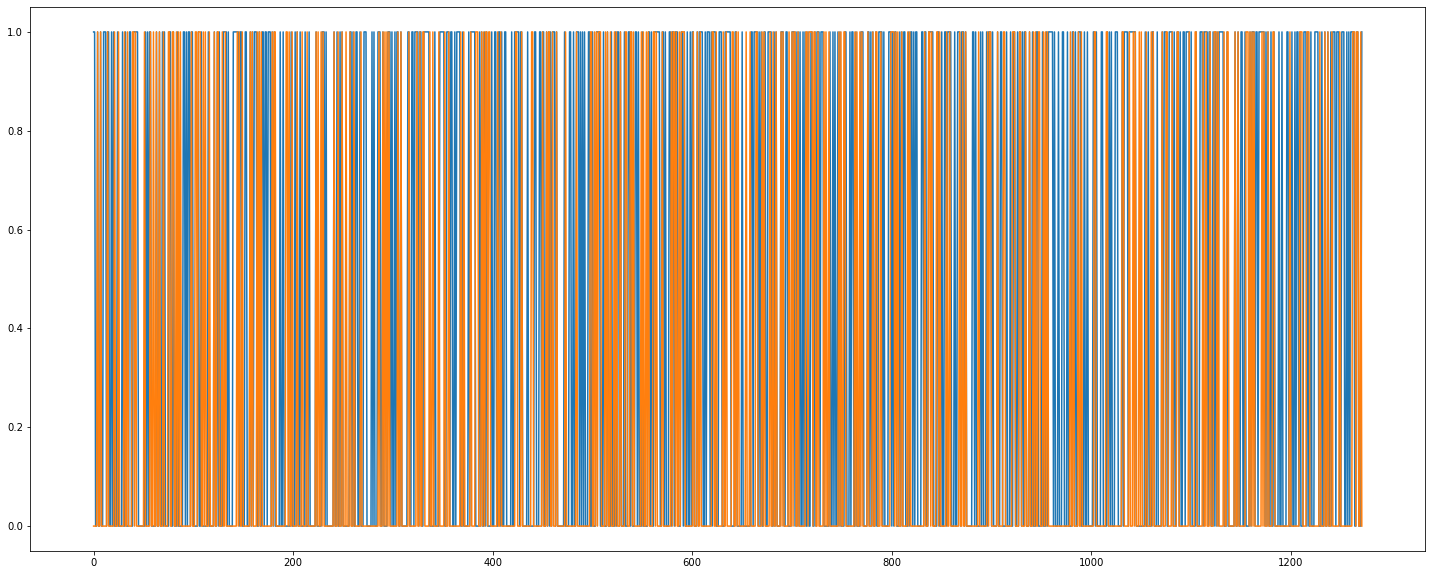

In [146]:
width = 25
height =10
fig = (width,height)
plt.figure(figsize = fig)
plt.plot(L_valid)
plt.plot(predictions)

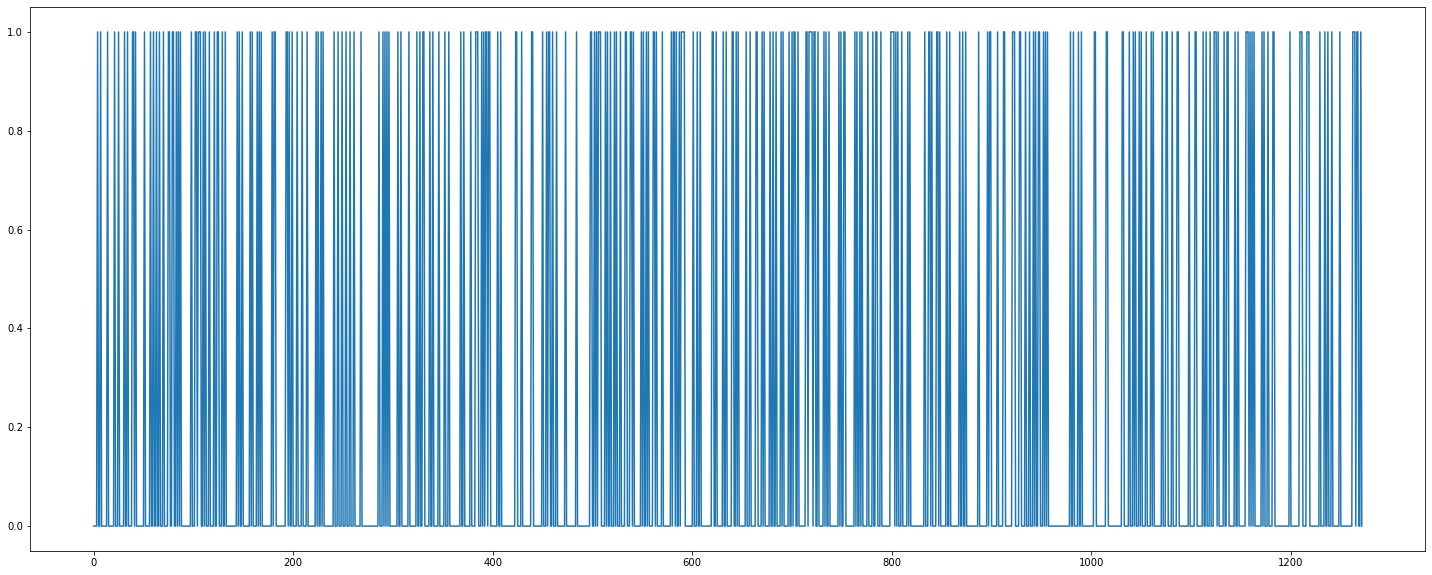

In [147]:
width = 25
height =10
fig = (width,height)
plt.figure(figsize = fig)
plt.plot(predictions)

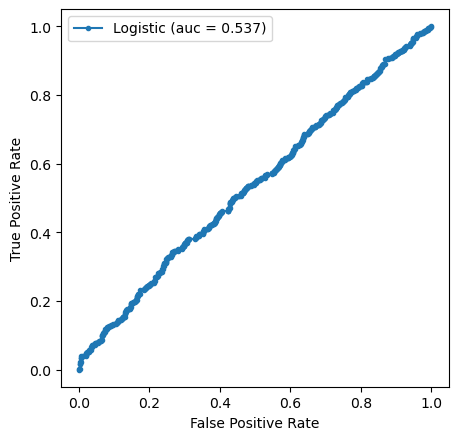

In [148]:
from sklearn.metrics import roc_curve, auc

LR_fpr, LR_tpr, threshold = roc_curve(L_valid, L_pred_LR)
auc_LR = auc(LR_fpr, LR_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(LR_fpr, LR_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_LR)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

